<a href="https://colab.research.google.com/github/mbrady4/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Basic_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

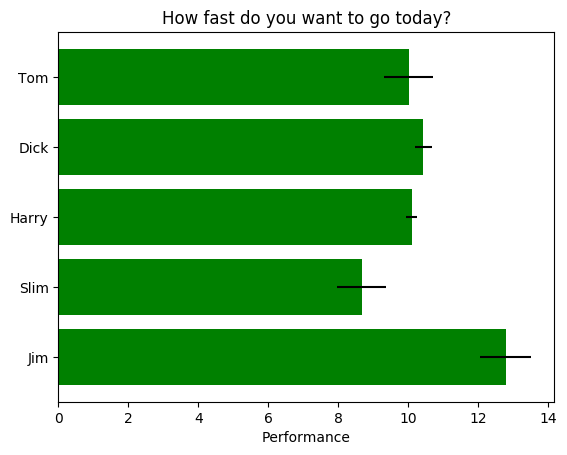

In [6]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

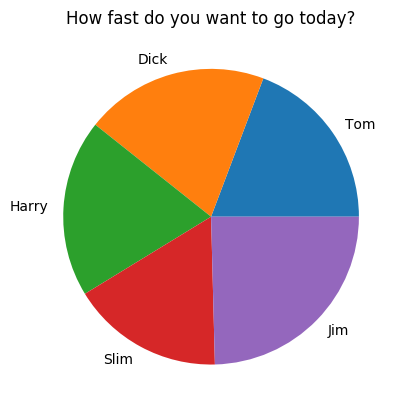

In [7]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

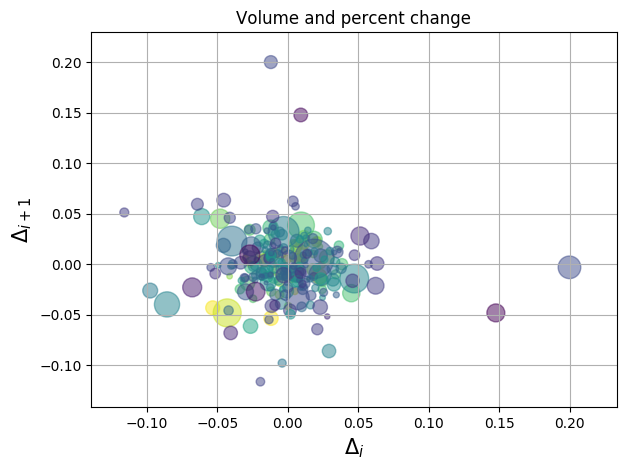

In [8]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

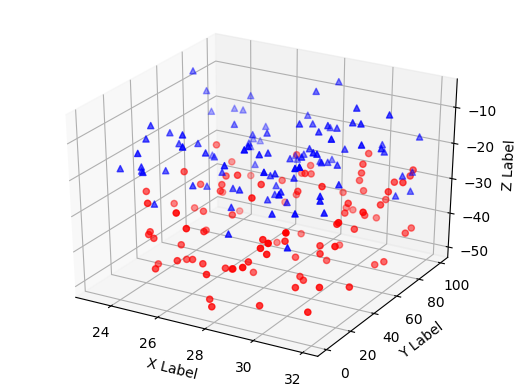

In [9]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



# 1. Hepatitis Dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data',na_values = ['?'], header = None, names=['Class','Age','Sex','Steroid','Antivirals',
                                                                                                                      'Fatigue','Malaise','Anorexia','Liver_Big','Liver_Firm',
                                                                                                                      'Spleen_Palpable','Spiders','Ascites','Varices','Bilrubin',
                                                                                                                      'Alk_Phosphate','SGOT','Albumin','Protime','Histology'])
print(df.shape)
df.head()

(155, 20)


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilrubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [11]:
def fill_na():
  
  df.Albumin = df.Albumin.fillna(np.mean(df.Albumin))
  df.Alk_Phosphate = df.Alk_Phosphate.fillna(mode(df.Alk_Phosphate))
  df.SGOT = df.SGOT.fillna(mode(df.Alk_Phosphate))
  df.Bilrubin = df.Bilrubin.fillna(np.mean(df.Bilrubin))
  df.Protime = df.Protime.fillna(float(60))
  
fill_na()
df = df.dropna()
print(df.shape)
df.isnull().sum()

(142, 20)


Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver_Big          0
Liver_Firm         0
Spleen_Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilrubin           0
Alk_Phosphate      0
SGOT               0
Albumin            0
Protime            0
Histology          0
dtype: int64

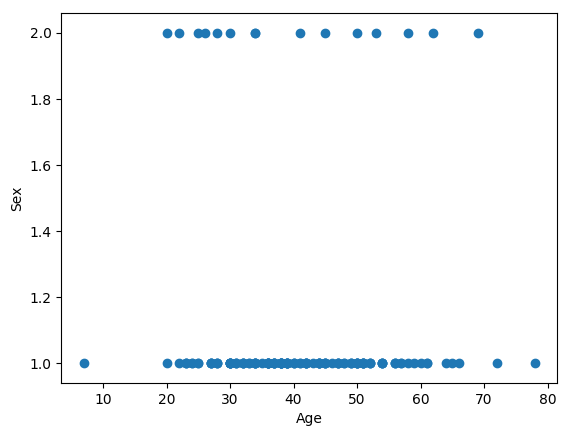

In [12]:
plt.xlabel('Age')
plt.ylabel('Sex')
plt.scatter(df['Age'],df['Sex']);

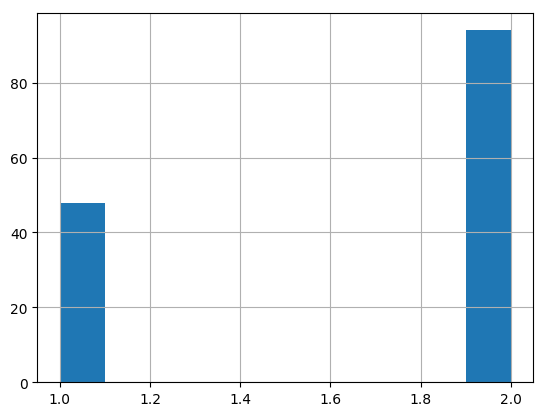

In [13]:
df['Spiders'].hist();  # Bins attribute determines how many grousp there are ... defaults to 10

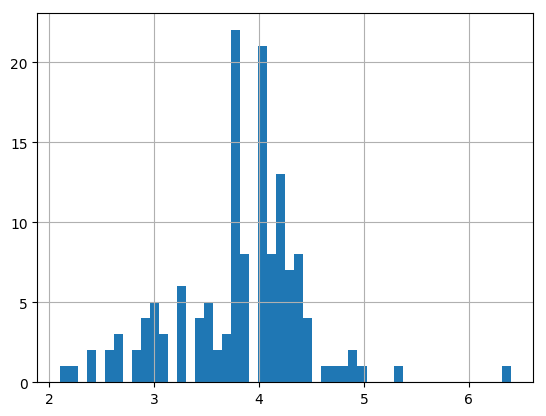

In [14]:
df['Albumin'].hist(bins=50)

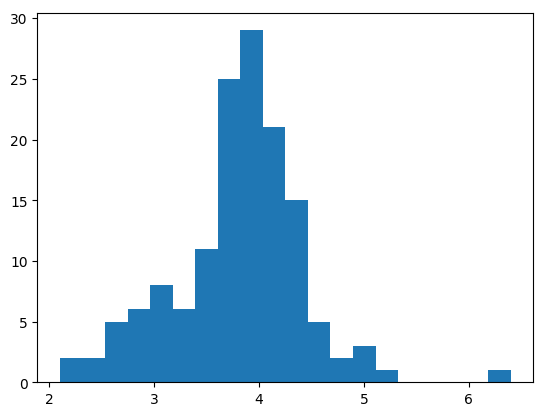

In [15]:
plt.hist(df['Albumin'], bins=20)
plt.show();

In [16]:
import seaborn as sns

my_graph = sns.pairplot(df) #Plots every column against each other in a scatterplot

Error in callback <function flush_figures at 0x7f901b630268> (for post_execute):


KeyboardInterrupt: ignored

## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more

# 3. Visualizing Forest Fires (In Northeast Portugal)

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [129]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [130]:
forest.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

## Historgram (Bar Chart)

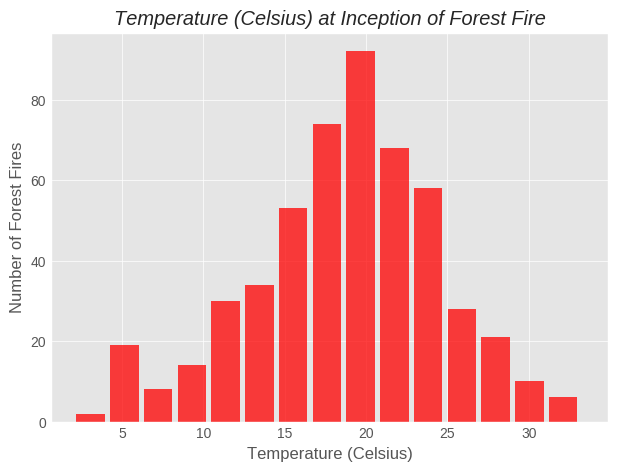

In [131]:
plt.style.use('ggplot')

plt.title('Temperature (Celsius) at Inception of Forest Fire', fontstyle='italic')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Forest Fires')
plt.hist(forest['temp'], bins=15, facecolor='r', alpha=0.75, width=1.75)

plt.show()

The bar chart clearly indicates that forest fires most frequently occur when the temperature is between 15 and 25 degrees celsius. 

## Scatter Plot

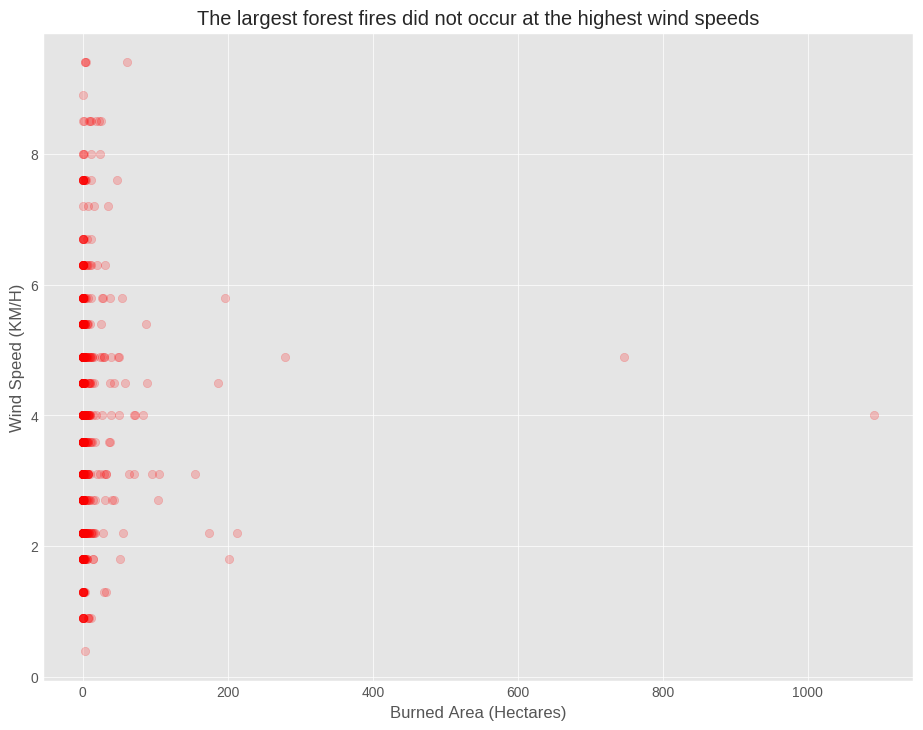

In [132]:
plt.figure(figsize=(10,8))
plt.xlabel('Burned Area (Hectares)')
plt.ylabel('Wind Speed (KM/H)')
plt.title('The largest forest fires did not occur at the highest wind speeds')
plt.scatter(forest['area'],forest['wind'], color='r', alpha=0.2)


plt.show()

## Line Plot

<Figure size 1000x800 with 0 Axes>

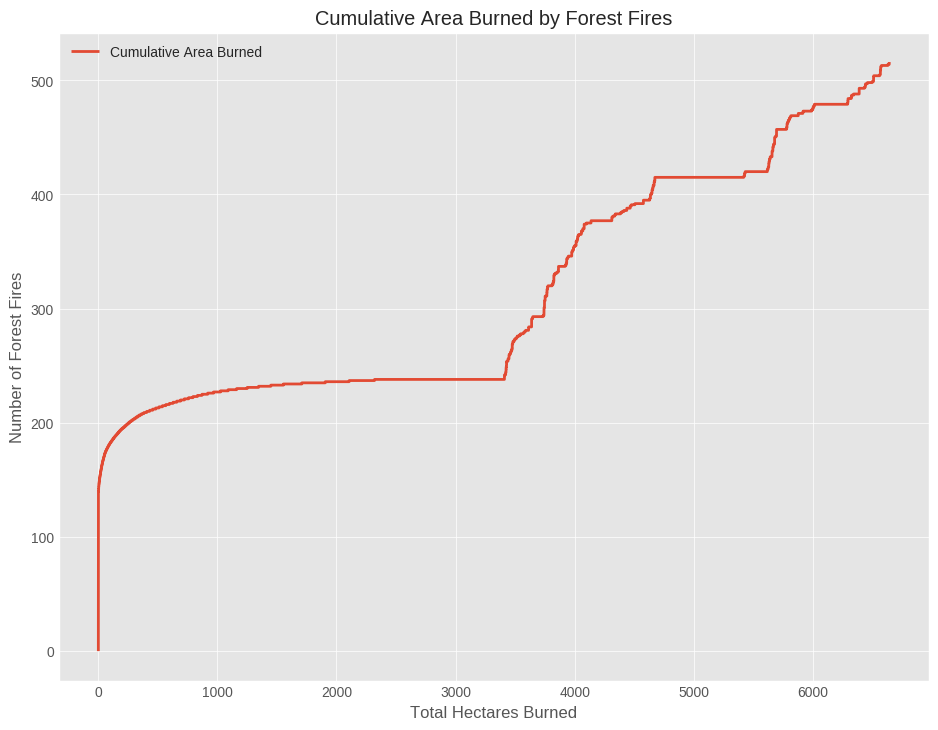

In [133]:
plt.figure(figsize=(10,8))
forest.reset_index().plot.line(forest.area.cumsum(), 'index', label='Cumulative Area Burned', drawstyle='steps', linewidth=2, figsize=(10,8))
plt.xlabel('Total Hectares Burned')
plt.ylabel('Number of Forest Fires')
plt.title('Cumulative Area Burned by Forest Fires')
plt.show()

# Overlaying Plots: Scatterplot and Regression Line

In [143]:
forest.sort_values(by=['RH'], ascending=True, axis=0, inplace=True)
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
85,1,2,sep,thu,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,0.00
197,4,5,sep,thu,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,11.06
50,4,4,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,0.00
111,3,4,mar,fri,91.7,33.3,77.5,9.0,18.8,18,4.5,0.0,0.00
218,4,5,sep,wed,92.9,133.3,699.6,9.2,19.4,19,1.3,0.0,31.72


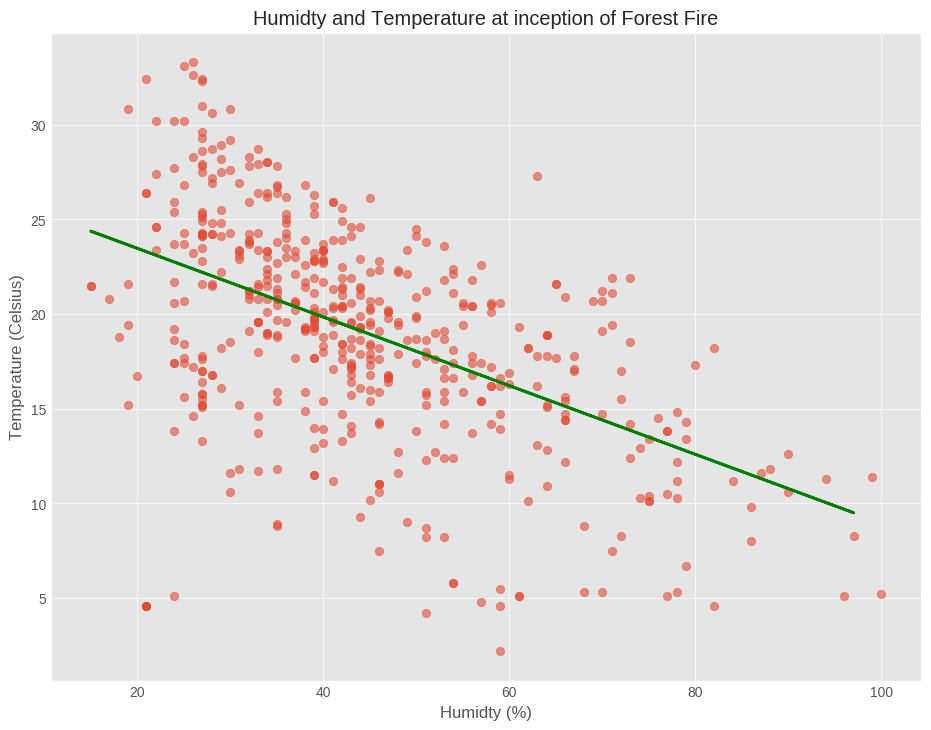

In [158]:
plt.figure(figsize=(10,8))
plt.xlabel('Humidty (%)')
plt.ylabel('Temperature (Celsius)')
plt.title('Humidty and Temperature at inception of Forest Fire')
plt.scatter(forest['RH'],forest['temp'], alpha=0.6);

from sklearn import linear_model
from sklearn.model_selection import train_test_split

train, test = train_test_split(forest, random_state=0)

features = train['RH']
features = features.values.reshape(-1,1)
target = train['temp']
target = target.values.reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(features,target)
predictions = model.predict(test['RH'].values.reshape(-1,1))
plt.plot(test['RH'], predictions, color='g', linewidth=2);



In [0]:
## Choropleth (Heat Map)

